In [1]:
import pandas as pd
import numpy as np
import wfdb
import ast

In [2]:
Y = pd.read_csv("ptbxl_database.csv", index_col = "ecg_id")
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

In [3]:
agg_df = pd.read_csv("scp_statements.csv", index_col = 0)
agg_df = agg_df[agg_df.diagnostic == 1]


In [4]:
def aggregate_diag(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

In [5]:
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diag)
Y = Y.loc[~Y['diagnostic_superclass'].apply(lambda x: len(x) != 1)]
Y.to_csv("superclass.csv")
Y.to_pickle('superclass.pkl')


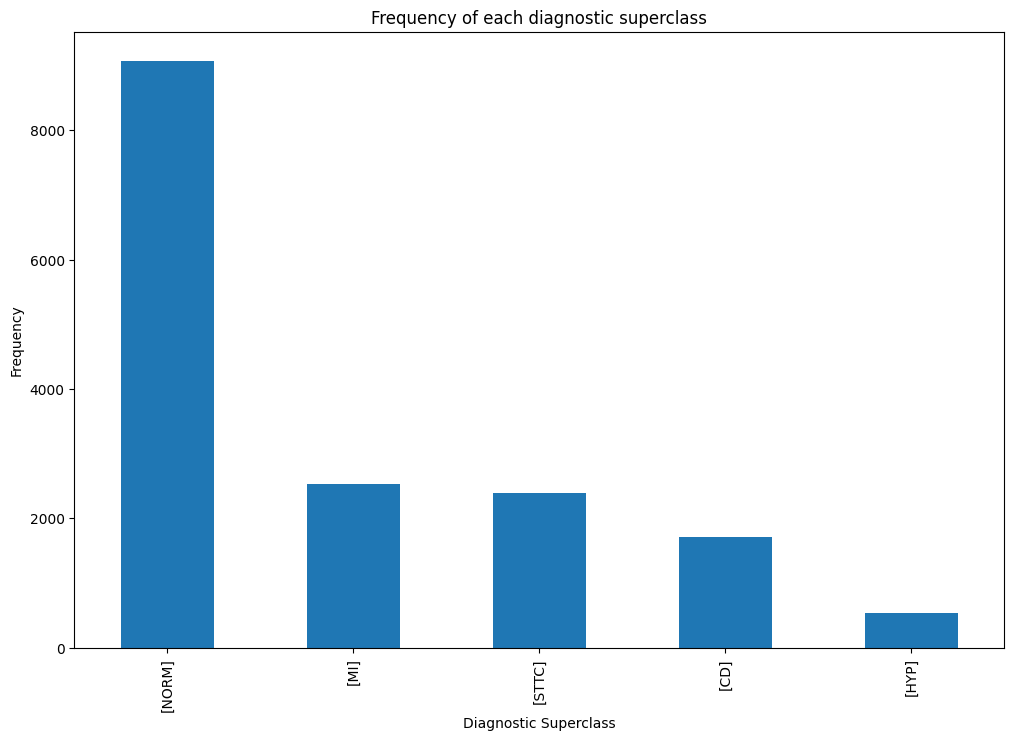

In [6]:
import matplotlib.pyplot as plt
# Count the number of occurrences of each element in 'diagnostic_superclass'
superclass_counts = Y['diagnostic_superclass'].value_counts()

# Plot the frequency of each diagnostic superclass
plt.figure(figsize=(12,8))
superclass_counts.plot(kind='bar')
plt.title('Frequency of each diagnostic superclass')
plt.xlabel('Diagnostic Superclass')
plt.ylabel('Frequency')
plt.show()



